
# E2 - Model Deployment in Used Vehicle Price Prediction

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [21]:
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTrain_carListings.zip')

In [3]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [4]:
data.shape

(500000, 6)

In [5]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

# Exercise P0.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the models using a manually implemented K-Fold (K=10) cross-validation
- 25% - Notebook explaining the process for selecting the best model. You must specify how the calibration of each of the parameters is done and how these change the performance of the model. It is expected that a clear comparison will be made of all implemented models.. Present the most relevant conslusions about the whole process.


Feature engineering

In [6]:
State_dummies = pd.get_dummies(data.State, prefix = 'State', dtype= int)
data = pd.concat([data, State_dummies], axis=1)

In [7]:
Make_dummies = pd.get_dummies(data.Make, prefix = 'Make', dtype= int)
data = pd.concat([data, Make_dummies], axis=1)

In [8]:
Model_dummies = pd.get_dummies(data.Model, prefix = 'Model', dtype= int)
data = pd.concat([data, Model_dummies], axis=1)

In [9]:
#Aplicar Label encoder a la variable model
from sklearn.preprocessing import LabelEncoder


In [10]:
categorical_features = ['State', 'Make', 'Model']

In [11]:
data[categorical_features] = data[categorical_features].apply(LabelEncoder().fit_transform)
data

,Price,Year,Mileage,State,Make,Model,State_ AK,State_ AL,State_ AR,State_ AZ,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
0,21490,2014,31909,20,27,305,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21250,2016,25741,17,6,83,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20925,2016,24633,40,14,400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14500,2012,84026,36,17,248,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,32488,2013,22816,42,17,489,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,16997,2013,40393,43,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499996,11990,2012,91794,47,14,400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499997,49991,2014,39107,25,10,438,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499998,21888,2010,62556,30,8,378,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#drop initial categorical features
data.drop(columns = categorical_features, inplace = True)

In [13]:
data.head()

,Price,Year,Mileage,State_ AK,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
0,21490,2014,31909,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21250,2016,25741,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20925,2016,24633,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14500,2012,84026,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,32488,2013,22816,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data[:1]

,Price,Year,Mileage,State_ AK,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
0,21490,2014,31909,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
features = ['Year', 'Mileage'] + list(State_dummies.columns) + list(Make_dummies.columns) + list(Model_dummies.columns)
features

['Year',
 'Mileage',
 'State_ AK',
 'State_ AL',
 'State_ AR',
 'State_ AZ',
 'State_ CA',
 'State_ CO',
 'State_ CT',
 'State_ DC',
 'State_ DE',
 'State_ FL',
 'State_ GA',
 'State_ HI',
 'State_ IA',
 'State_ ID',
 'State_ IL',
 'State_ IN',
 'State_ KS',
 'State_ KY',
 'State_ LA',
 'State_ MA',
 'State_ MD',
 'State_ ME',
 'State_ MI',
 'State_ MN',
 'State_ MO',
 'State_ MS',
 'State_ MT',
 'State_ NC',
 'State_ ND',
 'State_ NE',
 'State_ NH',
 'State_ NJ',
 'State_ NM',
 'State_ NV',
 'State_ NY',
 'State_ OH',
 'State_ OK',
 'State_ OR',
 'State_ PA',
 'State_ RI',
 'State_ SC',
 'State_ SD',
 'State_ TN',
 'State_ TX',
 'State_ UT',
 'State_ VA',
 'State_ VT',
 'State_ WA',
 'State_ WI',
 'State_ WV',
 'State_ WY',
 'Make_Acura',
 'Make_Audi',
 'Make_BMW',
 'Make_Bentley',
 'Make_Buick',
 'Make_Cadillac',
 'Make_Chevrolet',
 'Make_Chrysler',
 'Make_Dodge',
 'Make_FIAT',
 'Make_Ford',
 'Make_Freightliner',
 'Make_GMC',
 'Make_Honda',
 'Make_Hyundai',
 'Make_INFINITI',
 'Make_J

In [16]:
features = list(data.columns)
features.remove('Price')
features

['Year',
 'Mileage',
 'State_ AK',
 'State_ AL',
 'State_ AR',
 'State_ AZ',
 'State_ CA',
 'State_ CO',
 'State_ CT',
 'State_ DC',
 'State_ DE',
 'State_ FL',
 'State_ GA',
 'State_ HI',
 'State_ IA',
 'State_ ID',
 'State_ IL',
 'State_ IN',
 'State_ KS',
 'State_ KY',
 'State_ LA',
 'State_ MA',
 'State_ MD',
 'State_ ME',
 'State_ MI',
 'State_ MN',
 'State_ MO',
 'State_ MS',
 'State_ MT',
 'State_ NC',
 'State_ ND',
 'State_ NE',
 'State_ NH',
 'State_ NJ',
 'State_ NM',
 'State_ NV',
 'State_ NY',
 'State_ OH',
 'State_ OK',
 'State_ OR',
 'State_ PA',
 'State_ RI',
 'State_ SC',
 'State_ SD',
 'State_ TN',
 'State_ TX',
 'State_ UT',
 'State_ VA',
 'State_ VT',
 'State_ WA',
 'State_ WI',
 'State_ WV',
 'State_ WY',
 'Make_Acura',
 'Make_Audi',
 'Make_BMW',
 'Make_Bentley',
 'Make_Buick',
 'Make_Cadillac',
 'Make_Chevrolet',
 'Make_Chrysler',
 'Make_Dodge',
 'Make_FIAT',
 'Make_Ford',
 'Make_Freightliner',
 'Make_GMC',
 'Make_Honda',
 'Make_Hyundai',
 'Make_INFINITI',
 'Make_J

Test Train Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data.Price, test_size=0.2, random_state=42)

Modeling

*En este apartado, procedemos a ejecutar los siguientes modelos, cada uno con características específicas, con el objetivo de evaluar su rendimiento inicial.*

*   Regresión Lineal
*   Random Forest Regresión (n_estimators=100)
*   Red neuronal Regresión (Perceptrón Multicapa)
*   Primera capa oculta 100 neuronas
*   Segunda capa oculta 50 neuronas

*Para evaluar estos modelos, utilizamos dos métricas: MSE (Error Cuadrático Medio), que mide el promedio de los errores al cuadrado entre las predicciones y los valores reales, penalizando más los errores grandes, y RMSE (Raíz del Error Cuadrático Medio), que es la raíz cuadrada del MSE y proporciona una medida del error en las mismas unidades que los datos originales, con el fin de tener mejor una interpretación*





**Regresión Lineal**

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 20152546.180382535
Root Mean Squared Error: 4489.158738603764


*Como se puede evidenciar, el error que arroja la regresión es considerablemente alto, puntualmente, el RMSE, que está en las mismas unidades que el precio del automóvil, indica que, en promedio, el modelo se desvía del precio real en aproximadamente 20.152.546 unidades monetarias. Por esta razón, en el siguiente apartado vamos a implementar las técnicas de regularización Lasso y Ridge con su respectiva sintonización de hiperparametros  para determinar si es posible mejorar el resultado.*

In [23]:
#Regularización ridge

from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)

# Predicciones
y_pred_ridge = ridge_model.predict(X_test)

# Evaluación del modelo
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression Mean Squared Error: {mse_ridge}')
rmse_ridge = np.sqrt(mse_ridge)
print(f'Ridge Regression Root Mean Squared Error: {rmse_ridge}')

Ridge Regression Mean Squared Error: 20152655.038525775
Ridge Regression Root Mean Squared Error: 4489.1708631467545


In [24]:
#Sintonización del hiperparametro de ajuste en ridge

from sklearn.model_selection import GridSearchCV
ridge_model = Ridge()

# Definir el rango de valores de alpha para probar
alpha_values = {'alpha': np.logspace(0, 0.5, 1)}
grid_search = GridSearchCV(ridge_model, alpha_values, cv=5, scoring='neg_mean_squared_error')


grid_search.fit(X_train, y_train)
best_ridge_model = grid_search.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test)

# Evaluación del modelo
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression Mean Squared Error: {mse_ridge}')
rmse_ridge = np.sqrt(mse_ridge)
print(f'Ridge Regression Root Mean Squared Error: {rmse_ridge}')

#El mejor valor de alpha
print(f'Best alpha: {grid_search.best_params_["alpha"]}')

Ridge Regression Mean Squared Error: 20153598.570025604
Ridge Regression Root Mean Squared Error: 4489.275951645834
Best alpha: 1.0


*Tras aplicar la técnica de regularización ridge, la cual busca reducir los coeficientes de las variables independientes a valores más pequeños, se ve que el RMSE no disminuyó , se sintonizó el hiperparametro y se obtuvo que el mejor alpha es de 1.0*

In [25]:
#Regularización Lasso

from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.8)
lasso_model.fit(X_train, y_train)

# Predicciones
y_pred_lasso = lasso_model.predict(X_test)

# Evaluación del modelo
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression Mean Squared Error: {mse_lasso}')
rmse_lasso = np.sqrt(mse_lasso)
print(f'Lasso Regression Root Mean Squared Error: {rmse_lasso}')

c:\Users\ASUS RYZEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.765e+10, tolerance: 4.615e+09
  model = cd_fast.enet_coordinate_descent(


Lasso Regression Mean Squared Error: 20679288.130305756
Lasso Regression Root Mean Squared Error: 4547.4485297038555


In [26]:
#Sintonización del hiperparametro de ajuste en lasso
from sklearn.model_selection import GridSearchCV

lasso_model = Lasso()

# Definir el rango de valores de alpha para probar
alpha_values = {'alpha': np.logspace(0, 0.5, 1)}
grid_search = GridSearchCV(lasso_model, alpha_values, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor parámetro alpha encontrado
best_alpha = grid_search.best_params_['alpha']
print(f'Mejor alpha para Lasso: {best_alpha}')

# Ajustar el modelo con el mejor alpha
lasso_best_model = Lasso(alpha=best_alpha)
lasso_best_model.fit(X_train, y_train)
y_pred_lasso = lasso_best_model.predict(X_test)

# Evaluación del modelo
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression Mean Squared Error: {mse_lasso}')
rmse_lasso = np.sqrt(mse_lasso)
print(f'Lasso Regression Root Mean Squared Error: {rmse_lasso}')


c:\Users\ASUS RYZEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.503e+09, tolerance: 3.683e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\ASUS RYZEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.538e+09, tolerance: 3.693e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\ASUS RYZEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

Mejor alpha para Lasso: 1.0


c:\Users\ASUS RYZEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.048e+09, tolerance: 4.615e+09
  model = cd_fast.enet_coordinate_descent(


Lasso Regression Mean Squared Error: 20902516.12975893
Lasso Regression Root Mean Squared Error: 4571.926960238859


*La técnica de regularización lasso busca reducir algunos coeficientes exactamente a cero, lo que puede llevar a una omisión de características no relevantes. Tras aplicar esta técnica y sintonizar el hiperparametro se obtiene que el mejor alpha es 1.*

**Random Forest**

In [27]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 14833613.335116865
Root Mean Squared Error: 3851.443019845531


**Red Neuronal**

In [28]:
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

c:\Users\ASUS RYZEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error: 19769281.510619745
Root Mean Squared Error: 4446.266018876934


*Tras la ejecución preliminar de estos tres modelos con parámetros estándar, encontramos que **Random Forest** ofrece el mejor RMSE, destacándose como la métrica más favorable entre los tres modelos evaluados*

*Los resultados de la sintonización indican que 50 estimadores proporcionan un buen rendimiento del modelo. Sin embargo, al comparar la ejecución estandar inicial del modelo de 100 estimadores, se observa una leve mejora en el RMSE.*

# Validación cruzada KFOLD


*Para evaluar el rendimiento del modelo Random Forest Regression, realizamos una validación cruzada K-Fold (K=10), como se demuestra en el taller E1 -UsedVehiclePricePredictionDrift. Esto permite entrenar y evaluar el modelo en diferentes combinaciones de pliegues, proporcionando una medida más robusta del rendimiento. Sin embargo, debido al numero alto de voluemtria de la data, el procesamiento es computacionalmente alto y teniendo en cuenta que se corre sobre toda la data, el proceso no se puede completar de forma exitosa por el tamaño de los datos.*


In [35]:
df = data

In [ ]:
from sklearn.model_selection import KFold

# Crear las variables dummy y preparar los datos
datos_features = df.select_dtypes(include=["object"]).columns
#datos_dumm = pd.get_dummies(df[datos_features], drop_first=True)
df.drop(datos_features, axis=1, inplace=True)
datos = df
#pd.concat([df, datos_dumm], axis=1)

X = datos.drop(columns=['Price'])
y = datos['Price']

# Inicializar KFold
kf = KFold(n_splits=3)

# Listas para almacenar las métricas
mse_list = []
rmse_list = []

# Validación cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Crear el modelo de MLPRegressor
    model = RandomForestRegressor(n_estimators=100)

    # Ajustar el modelo
    model.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = model.predict(X_test)

    # Evaluar el modelo
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Almacenar las métricas
    mse_list.append(mse)
    rmse_list.append(rmse)

# Calcular y mostrar las métricas promedio
mean_mse = np.mean(mse_list)
mean_rmse = np.mean(rmse_list)

print(f'Mean Squared Error (Cross-Validation): {mean_mse}')
print(f'Root Mean Squared Error (Cross-Validation): {mean_rmse}')

In [18]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=11)

In [110]:
test_data[:1]

,Year,Mileage,State_ AK,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
207873,2015,35502,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
test_data[:1].shape

(1, 616)

In [99]:
v = model.predict(test_data[:1])[0]
v

14995

In [19]:
import joblib

In [21]:
joblib.dump(model, 'vehicle_price_prediction.pkl', compress=3)

['vehicle_price_prediction.pkl']

# Exercise P0.2 (50%)

Create an API of the model.

Example:
![](https://github.com/sergiomora03/AdvancedTopicsAnalytics/blob/main/notebooks/img/img015.PNG?raw=true)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine


In [22]:
!pip install flask-restx

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.8 MB 2.2 MB/s eta 0:00:02
   --------- ------------------------------ 0.7/2.8 MB 8.4 MB/s eta 0:00:01
   -------------------------- ------------- 1.8/2.8 MB 19.4 MB/s eta 0:00:01
   -------------------------- ------------- 1.8/2.8 MB 19.4 MB/s eta 0:00:01
   -------------------------- ------------- 1.8/2.8 MB 19.4 MB/s eta 0:00:01
   -------------------------- ------------- 1.8/2.8 MB 19.4 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 8.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
   ---------------------------------------- 52.8/52.8 kB 2.7 MB/s eta 0:00:00


*A continuación se crea la estructura del API que se va a utilizar para realizar la predicción.*

In [149]:
from flask import Flask
from flask_restx import Api, Resource, fields
import joblib

In [173]:
app = Flask(__name__)

api = Api(
    app,
    version='1.0',
    title='Vehicle Price Prediction API',
    description='Vehicle Price Prediction API')

ns = api.namespace('predict',
     description='Vehicle Price Prediction')

parser = api.parser()

parser.add_argument(
    'Year',
    type=int,
    required=True,
    help='Year of vehicle to predict price',
    location='args')

parser.add_argument(
    'Mileage',
    type=int,
    required=True,
    help='Mileage of vehicle to predict price',
    location='args')

parser.add_argument(
    'State',
    type=str,
    required=True,
    help='State of vehicle to predict price',
    location='args')

parser.add_argument(
    'Make',
    type=str,
    required=True,
    help='Make of vehicle to predict price',
    location='args')

parser.add_argument(
    'Model',
    type=str,
    required=True,
    help='Model of vehicle to predict price',
    location='args')

resource_fields = api.model('Resource', {
    'result': fields.String,
})

In [192]:
from m06_model_deployment import predict_proba

In [193]:
@ns.route('/')
class VehPricePredictionApi(Resource):

    @api.doc(parser=parser)
    @api.marshal_with(resource_fields)
    def get(self):
        args = parser.parse_args()

        Year = args['Year']
        Mileage = args['Mileage']
        State = args['State']
        Make = args['Make']
        Model = args['Model']

        return {
        "result": predict_proba(Year, Mileage, State, Make, Model)
        }, 200

In [194]:
#Run API

app.run(debug=True, use_reloader=False, host='0.0.0.0', port=5001)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5001
 * Running on http://192.168.1.13:5001
Press CTRL+C to quit
127.0.0.1 - - [27/Aug/2024 21:10:44] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/Aug/2024 21:10:44] "GET /swaggerui/droid-sans.css HTTP/1.1" 304 -
127.0.0.1 - - [27/Aug/2024 21:10:44] "GET /swaggerui/swagger-ui-bundle.js HTTP/1.1" 304 -
127.0.0.1 - - [27/Aug/2024 21:10:44] "GET /swaggerui/swagger-ui.css HTTP/1.1" 304 -
127.0.0.1 - - [27/Aug/2024 21:10:44] "GET /swaggerui/swagger-ui-standalone-preset.js HTTP/1.1" 304 -
127.0.0.1 - - [27/Aug/2024 21:10:45] "GET /swagger.json HTTP/1.1" 200 -
c:\Users\Acer\OneDrive\Documentos\MAIN\Tópicos Avanzados de Analítica\model_deployment\m06_model_deployment.py:654: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfram

# IMAGENES

*En la siguiente imagen se muestra la interfaz del API, donde se ingresarán los datos de year, mileage, State, Make, Model para realizar la predicción.*

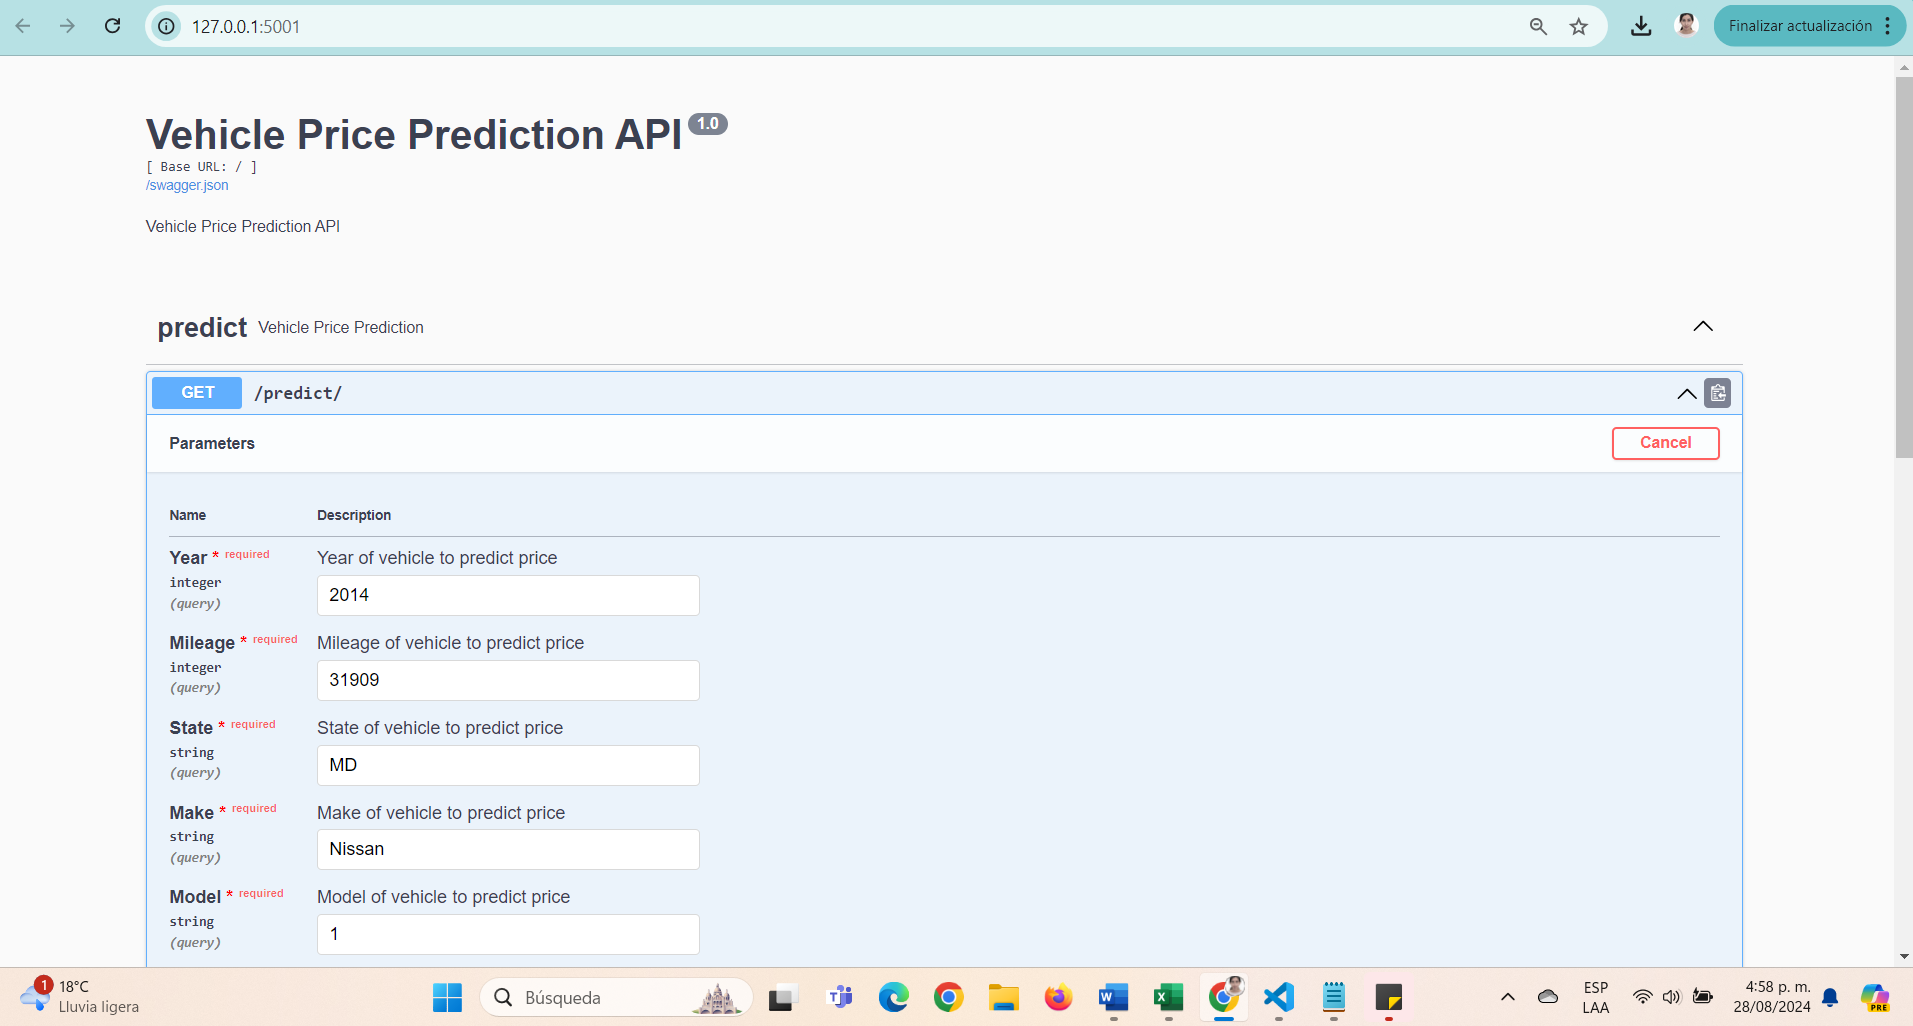

*Una vez ingresado los datos, se puede ver que la respuesta fue existosa y que tuvo como resultado 14.995*

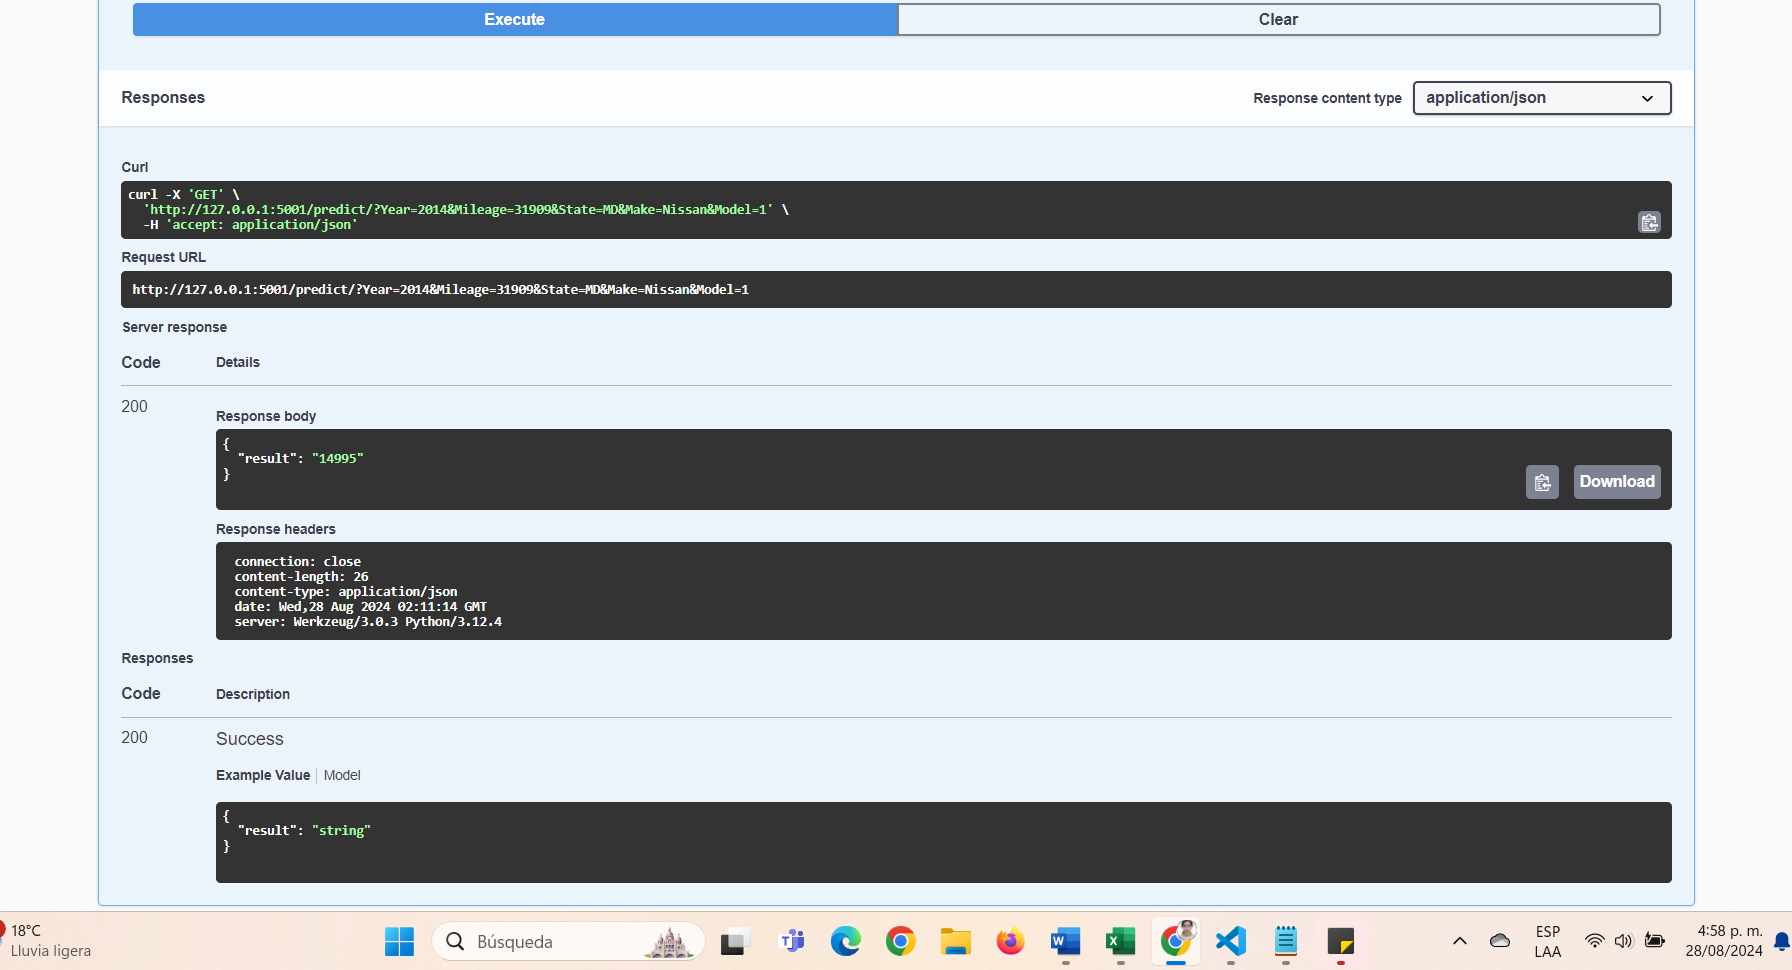